In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/c6/0cyt6hb142l4v20j3d67l7kr0000gn/T/ipykernel_35758/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


---
We will analyze a dataset of demolition permits in Austin (**Demolitions.csv**). It has the following fields:

* *Permit Class Mapped*: The different types of demolition permits.
* *Original Zip* and *Original Address*: The zipcode and address where the demolition will occur.
* *Property Legal Description*: How the location is described in the property records database.
* *Total Job Valuation* and *Total Existing Bldg SQFT*: The expected total cost of the job and the square-footage of the location.
* *Project Name*: Name assigned to the project.
* *Day Issued*: The day of the week when the permit was issued.
* *Contractor Company Name* and *Contractor Zip*: Information about the contractor who gets the demolition permit.

### [Q1 4 points] Read in the data as a dataframe and print the first 5 rows.

In [3]:
df = pd.read_csv('./Demolitions.csv')
df.iloc[:5]

,Permit Class Mapped,Original Zip,Original Address,Property Legal Description,Total Job Valuation,Total Existing Bldg SQFT,Project Name,Day Issued,Contractor Company Name,Contractor Zip
0,Residential,78703.0,3303 BONNIE RD,LOT 2 LESS E 6FT BLK 1 TOBIN JOHNSON SUBD,8500.0,2000.0,3303 BONNIE RD,THURSDAY,Southwest B Constructors,78753
1,Residential,78703.0,1102 ENFIELD RD,S PT OF LOT 29 S105' OF E135'AV OF LOT 28 OLT ...,10000.0,2400.0,1102 ENFIELD RD,THURSDAY,Jim Bennett Consulting,78748
2,Residential,78703.0,2710 CARLTON RD,LOT 3 RESUB OF LOT 10 MONTDALE,6371.0,1956.0,2710 CARLTON RD,FRIDAY,NaN,78705
3,Residential,78757.0,7602 TISDALE DR,LOT 64 JEFFERSON VILLAGE,8200.0,2283.0,7602 TISDALE DR,FRIDAY,NaN,78757
4,Residential,78731.0,5507 LEMONWOOD DR,LOT 70A LAKEWOOD VILLAGE AMENDED PLAT OF LOTS ...,0.0,0.0,5507 LEMONWOOD DR,FRIDAY,DAR Construction,78714-2028


### [Q2 6 points] Print out all the unique values of *Permit Class Mapped* and their frequencies.

In [4]:
df['Permit Class Mapped'].value_counts()

Permit Class Mapped
Residential    12012
Commercial      2147
Name: count, dtype: int64

### [Q3 6 points] In how many instances is the Original Zip identical to the Contractor Zip?

In [5]:
df['Original Zip'] = df['Original Zip'].fillna(0)
df['Original Zip'] = df['Original Zip'].astype(int)
df['Original Zip'] = df['Original Zip'].astype(str)
sum(df['Original Zip'] == df['Contractor Zip'])

1308

### [Q4 6 points] What fraction of rows have a missing Property Legal Description?

In [6]:
sum(df['Property Legal Description'].isnull())

2343

### [Q5 8 points] Show a bar plot where the x-axis is the Day Issued and the y-axis is the number of rows for those days.

<Axes: xlabel='Day Issued'>

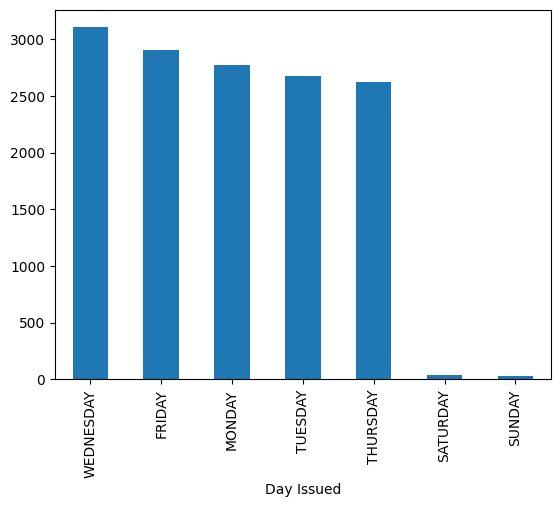

In [7]:
df['Day Issued'].value_counts().plot.bar()

### [Q6 8 points] Show two histograms side by side.

* The first histogram should be of the Total Existing Bldg SQFT, but restricted to only the rows where this number is less than 5000.
* The second histogram should be of the Total Job Valuation, but restricted to only the rows where this number is less than 10000.

<Axes: xlabel='Job Valuation', ylabel='Frequency'>

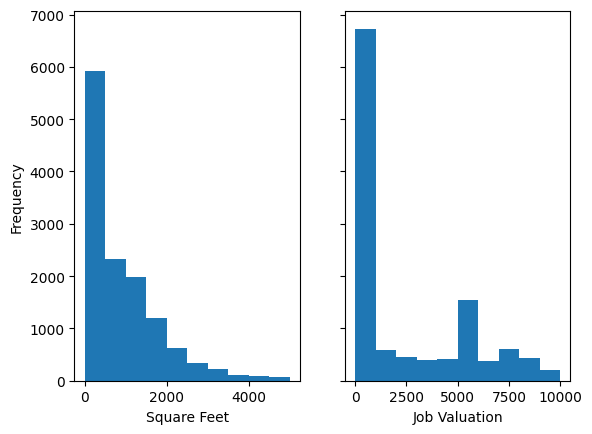

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)

df[df['Total Existing Bldg SQFT'] < 5000]['Total Existing Bldg SQFT'].plot.hist(ax=axes[0], xlabel='Square Feet', ylabel='Frequency')
df[df['Total Job Valuation'] < 10000]['Total Job Valuation'].plot.hist(ax=axes[1], xlabel='Job Valuation')

### [Q7 8 points] Print out the Project Names that are the most frequent.
If there are multiple such Project Names, you must output all of them.

In [91]:
project_counts = df['Project Name'].value_counts()
max_freq = project_counts.max()

', '.join(project_counts[project_counts == max_freq].index.values)

'1515 S LAMAR BLVD, 7337 MANCHACA RD'

### [Q8 12 points] Print out the top 5 Contractor Company Names based on the sum of Total Job Valuations for all rows associated with those companies.

In [97]:
df.groupby(['Contractor Company Name'])['Total Job Valuation'].sum().sort_values(ascending=False).iloc[:5]

Contractor Company Name
Austin Filter Systems, Inc             45500000.0
TRC                                    11500000.0
A & R Demolition Operations Account     7349172.0
AAR Inc.                                5502889.0
DAR Construction                        4899684.0
Name: Total Job Valuation, dtype: float64

### [Q9 12 points] Popular streets

* Many (but not all!) Original Address are of the form "streetnumber street name" (e.g. 3303 BONNIE RD).
* Extract just the street name part of the address (e.g., "BONNIE RD")
    * If the Original Address has only 1 word, then ignore this address.
* Print out the top-10 most frequent street names (i.e., the street names that occur on the most number of rows).

In [103]:
street_names = df['Original Address'].str.split(n=1, expand=True)
street_names = street_names[street_names.notnull()]
street_names[1].value_counts().iloc[:10]

1
S LAMAR BLVD      104
S CONGRESS AVE     95
N LAMAR BLVD       71
WESTLAKE DR        70
BURNET RD          69
WILLOW ST          62
S 3RD ST           62
HASKELL ST         60
CHICON ST          59
E 3RD ST           58
Name: count, dtype: int64

### [Q10 15 points] Common company last-names

* For each *unique* Contractor Company Name, figure out the last word in its name
    * For example, a company named "Southwest B Constructors" has last-name "Constructors"
    * If the company's name has only one word, that is the last word.
* Clean up these last-words by removing anything except upper-case or lower-case letters
    * If the last word is "Inc.", the clean last word is "Inc"
    * If the last word is "%ABC&", the clean last word is "ABC"
    * If the last word is "%ABC&&DEF@@", the clean last word is "ABCDEF"
* Print out the top-5 most common clean-last-words

*Note*: Remember that each company name can occur on multiple rows. For the top-5 list, don't count these repetitions; each company name is counted only once.

In [122]:
from string import punctuation

names = pd.Series(df[df['Contractor Company Name'].notnull()]['Contractor Company Name'].unique())
last_words = names.apply(lambda x: x.split()[-1])

def clean_words(word: str) -> str:
    bad_chars = set(punctuation)

    res = ''
    for char in word:
        if char not in bad_chars:
            res += char
    
    return res

last_words.apply(clean_words).value_counts().iloc[:5]



LLC             594
Inc             316
Construction    251
Homes           118
MAIN             59
Name: count, dtype: int64

### [Q11 15 points] Most common contractors
Figure out which Contractor Zips have at least 20 unique Contractor Company Names.
For each of these Contractor Zips, print out the Contractor Company Name that is most frequent (i.e., shows up in the most rows).

In [145]:
import string

'How Are You? I Am Good'